# Importing 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing climate and pleasant weather data sets
path = r'C:\Users\Administrator\Desktop\Projects (Carrer foundry)\Data sets'
df_clean = pd.read_csv(os.path.join(path, 'Climate_Cleaned.csv'))
pleasant_clean = pd.read_csv(os.path.join(path, 'Pleasant_Day_Cleaned.csv'))
climate = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))
climate_answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

# Data Prep

In [4]:
df_clean.head()

Unnamed: 0  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0           0                  7            0.85           1.018   
1           1                  6            0.84           1.018   
2           2                  8            0.90           1.018   
3           3                  3            0.92           1.018   
4           4                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  STOCKHOLM_temp_max  \
0              6.5             0.8            10.9  ...                 4.9   
1              6.1             3.3            10.1  ...                 5.0   
2              8.5             5.1             9.9  ...                 4.1   
3              6.3             3.8            10.6  ...                 2.3   
4              3.0            -0.7             6.0  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 136 columns]

In [5]:
climate.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                 0             0.7  ...                     5   
1                 0             1.1  ...                     7   
2                 0             0.0  ...                     7   
3                 0             4.1  ...                     7   
4                 0             5.4  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                    0.34                    0                4.7   
1                    0.84                    0                0.7   
2                    0.08                    0                0.1   
3                    0.98                    0                0.0   
4                    0.00                    0                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 170 columns]

In [7]:
df_clean.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
df_clean.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  STOCKHOLM_temp_max  \
0            10.9                     1  ...                 4.9   
1            10.1                     6  ...                 5.0   
2             9.9                     6  ...                 4.1   
3            10.6                     8  ...                 2.3   
4             6.0                     8  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 135 columns]

In [10]:
# adding back in the date information so we can refine our time period for the dec
df_clean.insert(0, 'DATE', climate['DATE'])
df_clean.insert(1, 'MONTH', climate['MONTH'])
df_clean.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
0              6.5             0.8  ...                 4.9   
1              6.1             3.3  ...                 5.0   
2              8.5             5.1  ...                 4.1   
3              6.3             3.8  ...                 2.3   
4              3.0            -0.7  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 137 columns]

In [29]:
df_10 = df_clean[df_clean['DATE'].astype(str).str.startswith('201')]
df_00 = df_clean[df_clean['DATE'].astype(str).str.startswith('200')]

In [30]:
answers_10 = climate_answers[climate_answers['DATE'].astype(str).str.startswith('201')]
answers_00 = climate_answers[climate_answers['DATE'].astype(str).str.startswith('200')]

In [31]:
df_10.drop(['DATE', 'MONTH'], axis = 1, inplace = True)
df_00.drop(['DATE', 'MONTH'], axis = 1, inplace = True)
answers_10.drop(['DATE'], axis = 1, inplace = True)
answers_00.drop(['DATE'], axis = 1, inplace = True)

In [43]:
# reshaping data
X1 = df_00.to_numpy()
y1 = answers_00.max(axis=1)
X2 = df_10.to_numpy()
y2 = answers_10.max(axis=1)
y1 = y1.to_numpy().reshape(-1)
y2 = y2.to_numpy().reshape(-1)

In [44]:
print(X1.shape, X2.shape, y1.shape, y2.shape)

(3653, 135) (3652, 135) (3653,) (3652,)


In [45]:
# Split data into train and test sets

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state = 42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state = 42)

In [46]:
print(X1_train.shape, y1_train.shape)
print(X1_test.shape, y1_test.shape)
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

(2739, 135) (2739,)
(914, 135) (914,)
(2739, 135) (2739,)
(913, 135) (913,)


# Random Forest Model

In [53]:
# Create a RF classifier
clf1 = RandomForestClassifier(n_estimators = 100, max_depth = 10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf1.fit(X1_train, y1_train)

RandomForestClassifier(max_depth=10)

In [54]:
# Perform predictions on the test dataset
y1_pred = clf1.predict(X1_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y1_test, y1_pred))

Model Accuracy:  0.9562363238512035


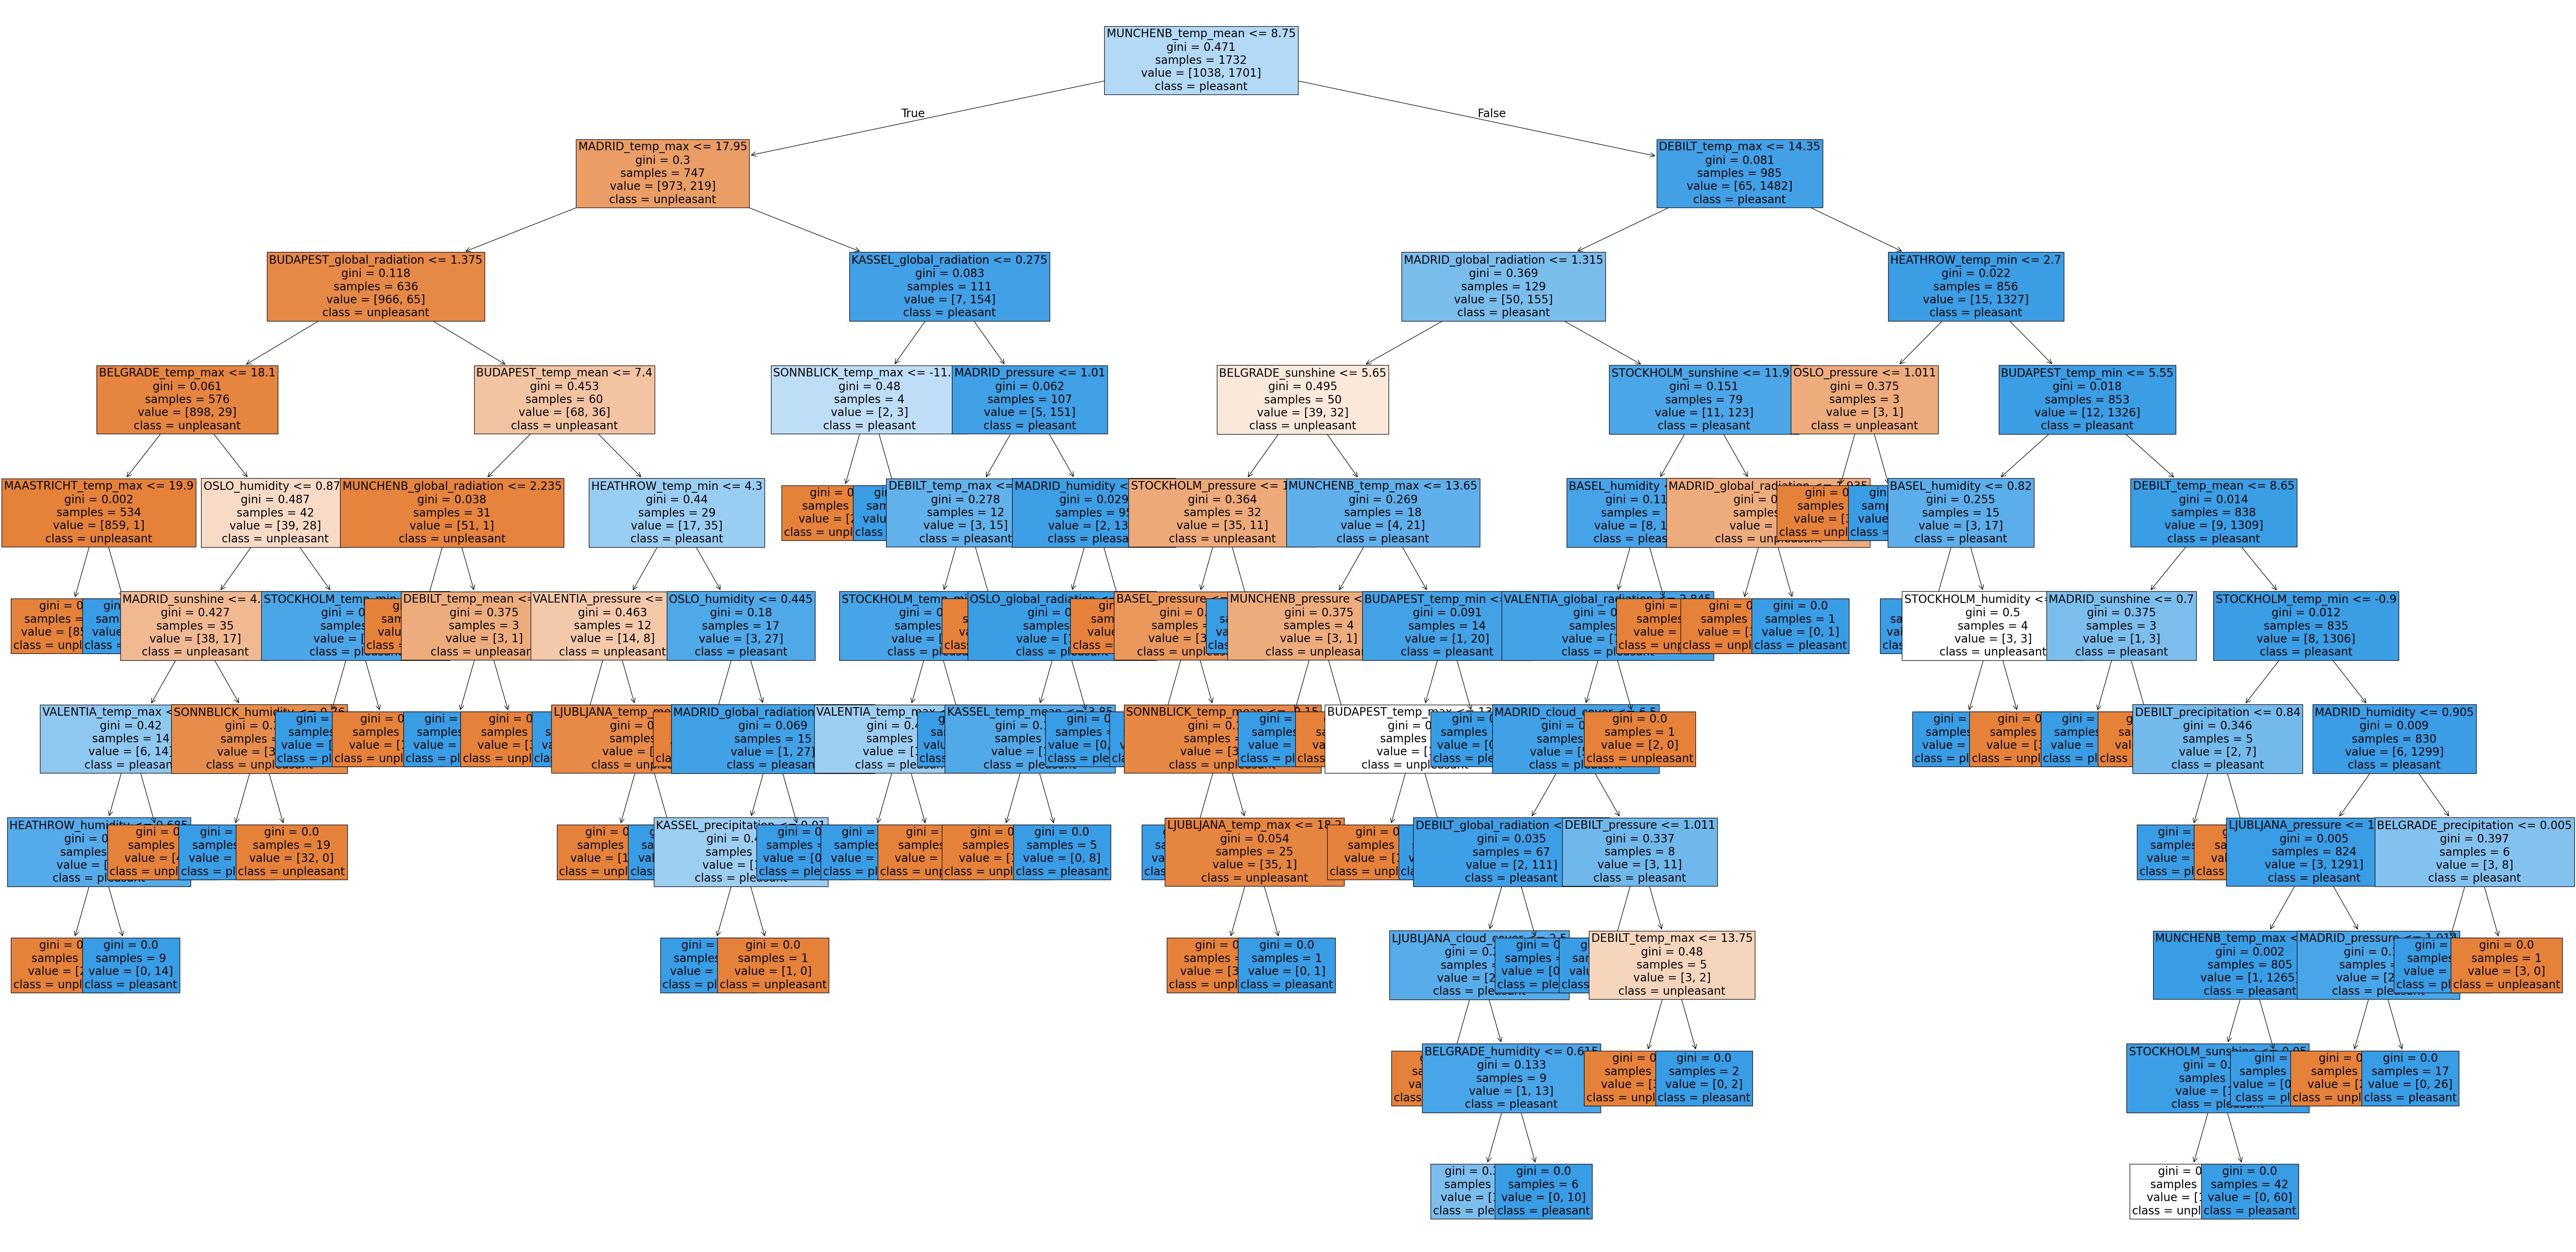

In [55]:
# Random tree for 2000's

fig = plt.figure(figsize=(80,40))
plot_tree(clf1.estimators_[5], fontsize = 20, feature_names=df_decade.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

## 2010's Random Forest 

In [56]:
# Create a RF classifier
clf2 = RandomForestClassifier(n_estimators = 100, max_depth = 10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf2.fit(X2_train, y2_train)

RandomForestClassifier(max_depth=10)

In [57]:
# Perform predictions on the test dataset
y2_pred = clf2.predict(X2_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y2_test, y2_pred))

Model Accuracy:  0.9605695509309967


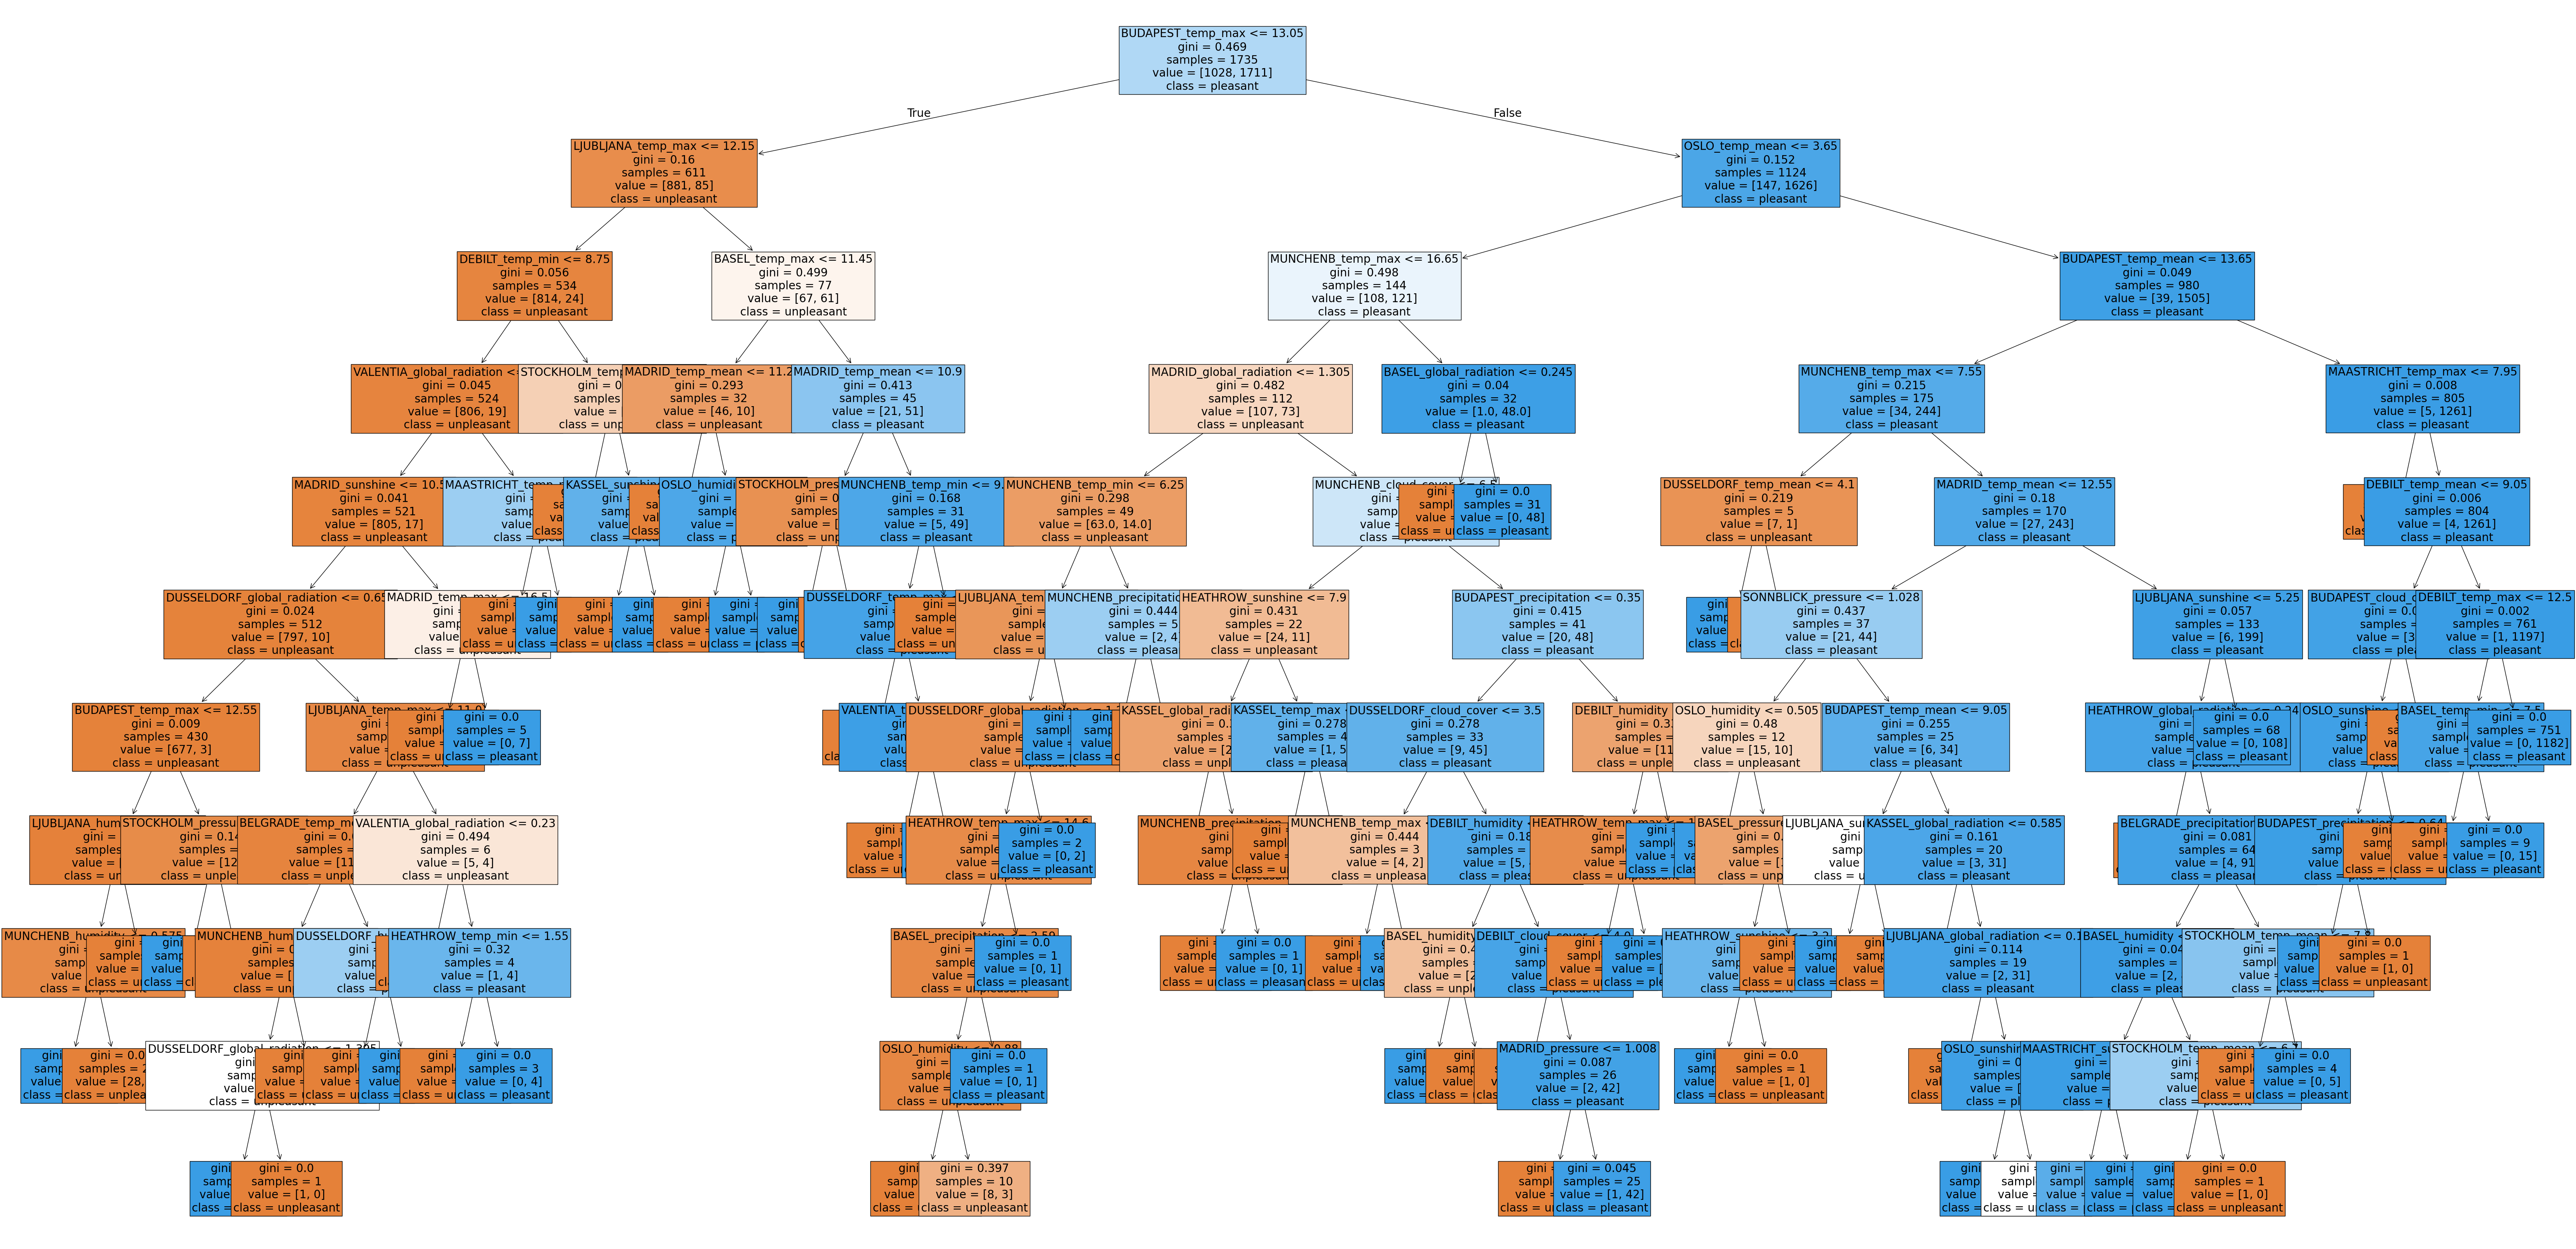

In [58]:
# Random tree for 2010's

fig = plt.figure(figsize=(80,40))
plot_tree(clf2.estimators_[5], fontsize = 20, feature_names=df_decade.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

# Feature importance

In [59]:
# Retrieve feature importances from the trained model
feature_importances_1 = clf1.feature_importances_
print("Feature Importances:", feature_importances_1)
print(feature_importances_1.shape)

Feature Importances: [0.00063933 0.00098    0.00110337 0.00129903 0.00070593 0.0010948
 0.02277831 0.00180392 0.02950768 0.00118699 0.00356137 0.00100623
 0.01138845 0.00314904 0.00193181 0.03370702 0.00901498 0.02946585
 0.00047086 0.00205414 0.00121627 0.01253068 0.00108734 0.00182602
 0.05714932 0.015666   0.05636797 0.00046682 0.00115045 0.00118759
 0.0093123  0.00047775 0.00134368 0.00802205 0.00126556 0.01026763
 0.00030153 0.00080723 0.00096244 0.00481185 0.00054853 0.00117625
 0.00807117 0.00511338 0.01860382 0.00072177 0.00113466 0.00085246
 0.00358593 0.00087053 0.00072203 0.00346962 0.00180825 0.02274151
 0.00047905 0.0008178  0.00107232 0.0035283  0.00083386 0.00098069
 0.01566302 0.0066734  0.01281493 0.00053468 0.00146775 0.00149921
 0.00233634 0.00068499 0.00141946 0.04966804 0.0072027  0.05570272
 0.0005116  0.00092659 0.00099538 0.00202762 0.00087971 0.00049921
 0.00879921 0.00119048 0.02291472 0.00082435 0.00404283 0.0023835
 0.00625784 0.0016252  0.00414689 0.0689272

In [60]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_1 = feature_importances_1.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_1.shape)

Reshaped Importances Shape: (1, 15, 9)


In [61]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_1 = np.sum(reshaped_importances_1[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_1.shape)
print("Collapsed Importances:", collapsed_importances_1)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.05991237 0.09441174 0.1483686  0.03349385 0.04039621 0.03590676
 0.04286337 0.12051588 0.03874453 0.23242163 0.09060735 0.01544275
 0.01891853 0.01752107 0.01047537]


In [62]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [63]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_1 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_1
})

In [64]:
# Sort by importance for chart readability
collapsed_importances_df_1 = collapsed_importances_df_1.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_1)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.232422
2         BUDAPEST    0.148369
7        LJUBLJANA    0.120516
1         BELGRADE    0.094412
10        MUNCHENB    0.090607
0            BASEL    0.059912
6           KASSEL    0.042863
4       DUSSELDORF    0.040396
8       MAASTRICHT    0.038745
5         HEATHROW    0.035907
3           DEBILT    0.033494
12       SONNBLICK    0.018919
13       STOCKHOLM    0.017521
11            OSLO    0.015443
14        VALENTIA    0.010475


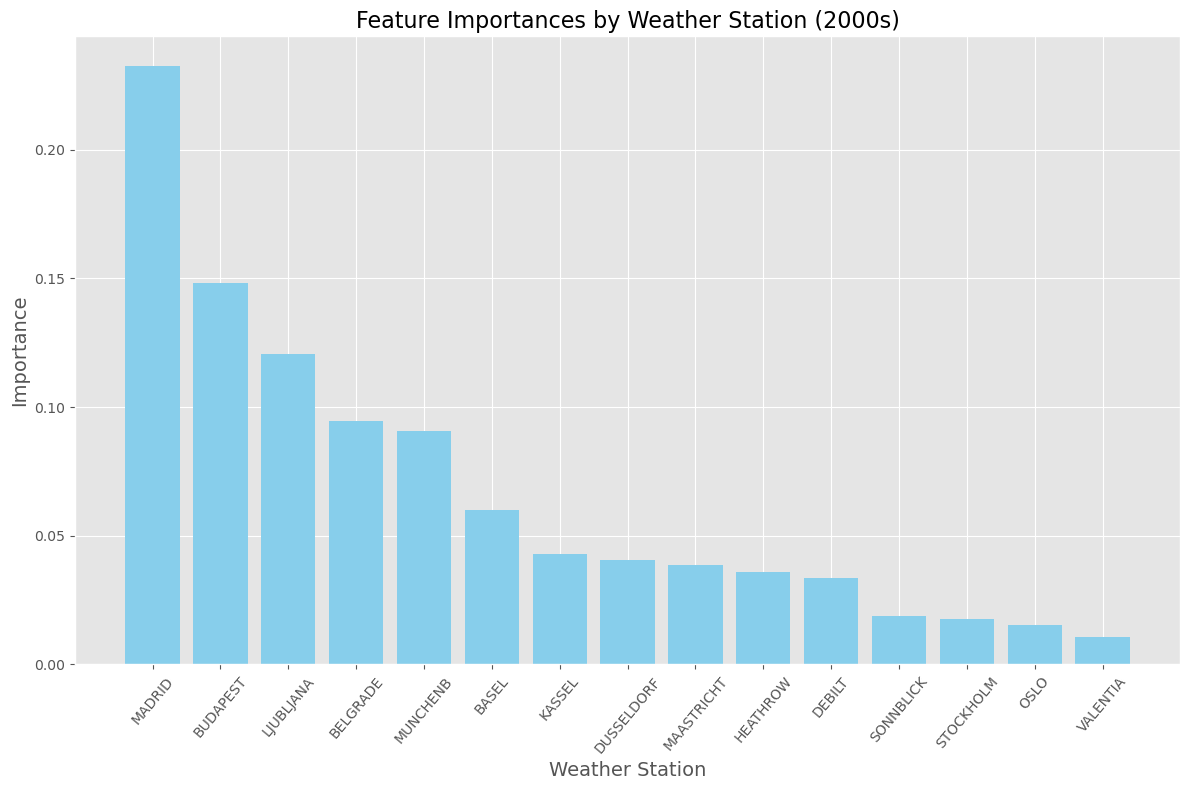

In [66]:
# Plot the importances

plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_1['Weather Station'], collapsed_importances_df_1['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2000s)', fontsize=16)
plt.tight_layout()
plt.show()

## 2010's bar chart

In [67]:
feature_importances_2 = clf2.feature_importances_
print("Feature Importances:", feature_importances_2)

Feature Importances: [3.25721442e-04 1.23547447e-03 9.98118274e-04 3.28704555e-03
 4.80611130e-04 9.09997478e-04 4.88470348e-02 6.32605677e-03
 4.39559507e-02 1.11563556e-03 1.50840303e-03 1.85151775e-03
 1.28627434e-03 2.69519258e-03 1.51411454e-03 2.21568174e-02
 8.58547250e-03 2.72074391e-02 2.37584030e-04 0.00000000e+00
 0.00000000e+00 6.30804410e-04 1.04544726e-03 9.15075302e-04
 4.61312801e-02 8.18342981e-03 4.85094738e-02 4.42753724e-04
 8.96283754e-04 1.05629619e-03 4.85258455e-03 6.05264948e-04
 6.50341156e-04 9.37107422e-03 1.39411633e-03 5.42524928e-02
 4.50128712e-04 6.68615768e-04 9.60953158e-04 2.79944015e-03
 5.81990140e-04 5.24185451e-04 1.78242742e-02 1.01382604e-03
 2.37464583e-02 4.41433138e-04 1.55560660e-03 1.41266972e-03
 5.79812016e-03 6.53643159e-04 1.14422325e-03 7.75528497e-03
 5.54876455e-03 1.85880600e-02 6.55774357e-04 3.83037404e-04
 5.16884066e-04 9.19476820e-04 4.47526325e-04 5.88319071e-04
 6.44788151e-04 6.54480914e-04 1.08142616e-03 5.20404969e-04
 2.

In [68]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_2 = feature_importances_2.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_2.shape)

Reshaped Importances Shape: (1, 15, 9)


In [69]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_2 = np.sum(reshaped_importances_2[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_2.shape)
print("Collapsed Importances:", collapsed_importances_2)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.10636601 0.06792087 0.10565309 0.07352121 0.04856987 0.04289781
 0.00589171 0.14061916 0.03644097 0.17840053 0.07641562 0.04132106
 0.01186032 0.06032473 0.00379704]


In [70]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_2 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_2
})

In [71]:
# Sort by importance for chart readability
collapsed_importances_df_2 = collapsed_importances_df_2.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_2)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.178401
7        LJUBLJANA    0.140619
0            BASEL    0.106366
2         BUDAPEST    0.105653
10        MUNCHENB    0.076416
3           DEBILT    0.073521
1         BELGRADE    0.067921
13       STOCKHOLM    0.060325
4       DUSSELDORF    0.048570
5         HEATHROW    0.042898
11            OSLO    0.041321
8       MAASTRICHT    0.036441
12       SONNBLICK    0.011860
6           KASSEL    0.005892
14        VALENTIA    0.003797


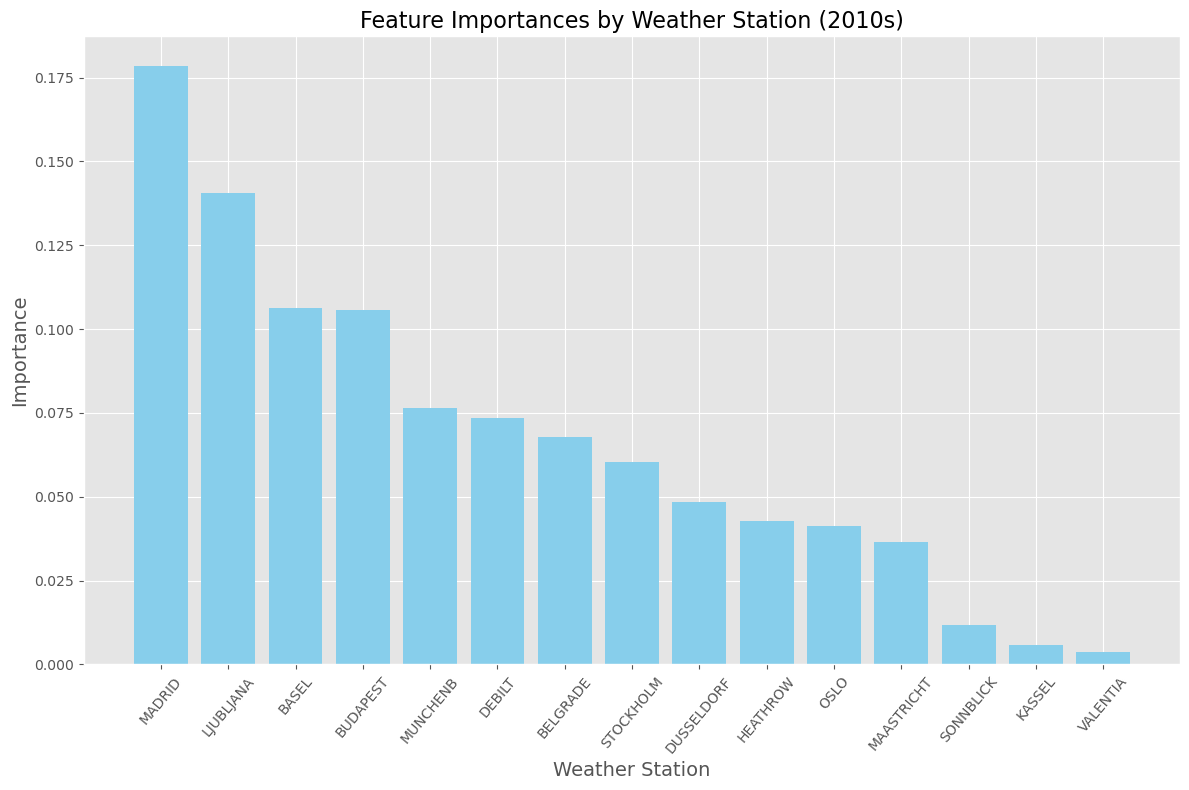

In [72]:
# Plot the importances

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_2['Weather Station'], collapsed_importances_df_2['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2010s)', fontsize=16)
plt.tight_layout()
plt.show()

# Top three most important stations 

In [73]:
df_mad = df_clean[df_clean.columns[df_clean.columns.astype(str).str.startswith('MADRID')]]
df_bud = df_clean[df_clean.columns[df_clean.columns.astype(str).str.startswith('BUDAPEST')]]
df_lju = df_clean[df_clean.columns[df_clean.columns.astype(str).str.startswith('LJUBLJANA')]]

In [77]:
print(df_mad.shape, df_bud.shape, df_lju.shape)

(22950, 9) (22950, 9) (22950, 9)


In [78]:
mad_answers = pleasant_clean[pleasant_clean.columns[pleasant_clean.columns.astype(str).str.startswith('MADRID')]]
bud_answers = pleasant_clean[pleasant_clean.columns[pleasant_clean.columns.astype(str).str.startswith('BUDAPEST')]]
lju_answers = pleasant_clean[pleasant_clean.columns[pleasant_clean.columns.astype(str).str.startswith('LJUBLJANA')]]

In [79]:
print(mad_answers.shape, bud_answers.shape, lju_answers.shape)

(22950, 1) (22950, 1) (22950, 1)


In [80]:
ym = mad_answers.max(axis=1)
ym = ym.to_numpy().reshape(-1)
yb = bud_answers.max(axis=1)
yb = yb.to_numpy().reshape(-1)
yl = lju_answers.max(axis=1)
yl = yl.to_numpy().reshape(-1)
Xm = df_mad.to_numpy()
Xb = df_bud.to_numpy()
Xl = df_lju.to_numpy()

In [81]:
print(Xm.shape,ym.shape,Xb.shape,yb.shape,Xl.shape,yl.shape)

(22950, 9) (22950,) (22950, 9) (22950,) (22950, 9) (22950,)


In [82]:
# Split data into train and test sets

Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm,ym,random_state = 42)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb,yb,random_state = 42)
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl,yl,random_state = 42)

## Madrid analysis

In [86]:
# Create a RF classifier
clfm = RandomForestClassifier(n_estimators = 100, max_depth = 5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clfm.fit(Xm_train, ym_train)

RandomForestClassifier(max_depth=5)

In [87]:
# Perform predictions on the test dataset
ym_pred = clfm.predict(Xm_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(ym_test, ym_pred))

Model Accuracy:  0.9996514464970373


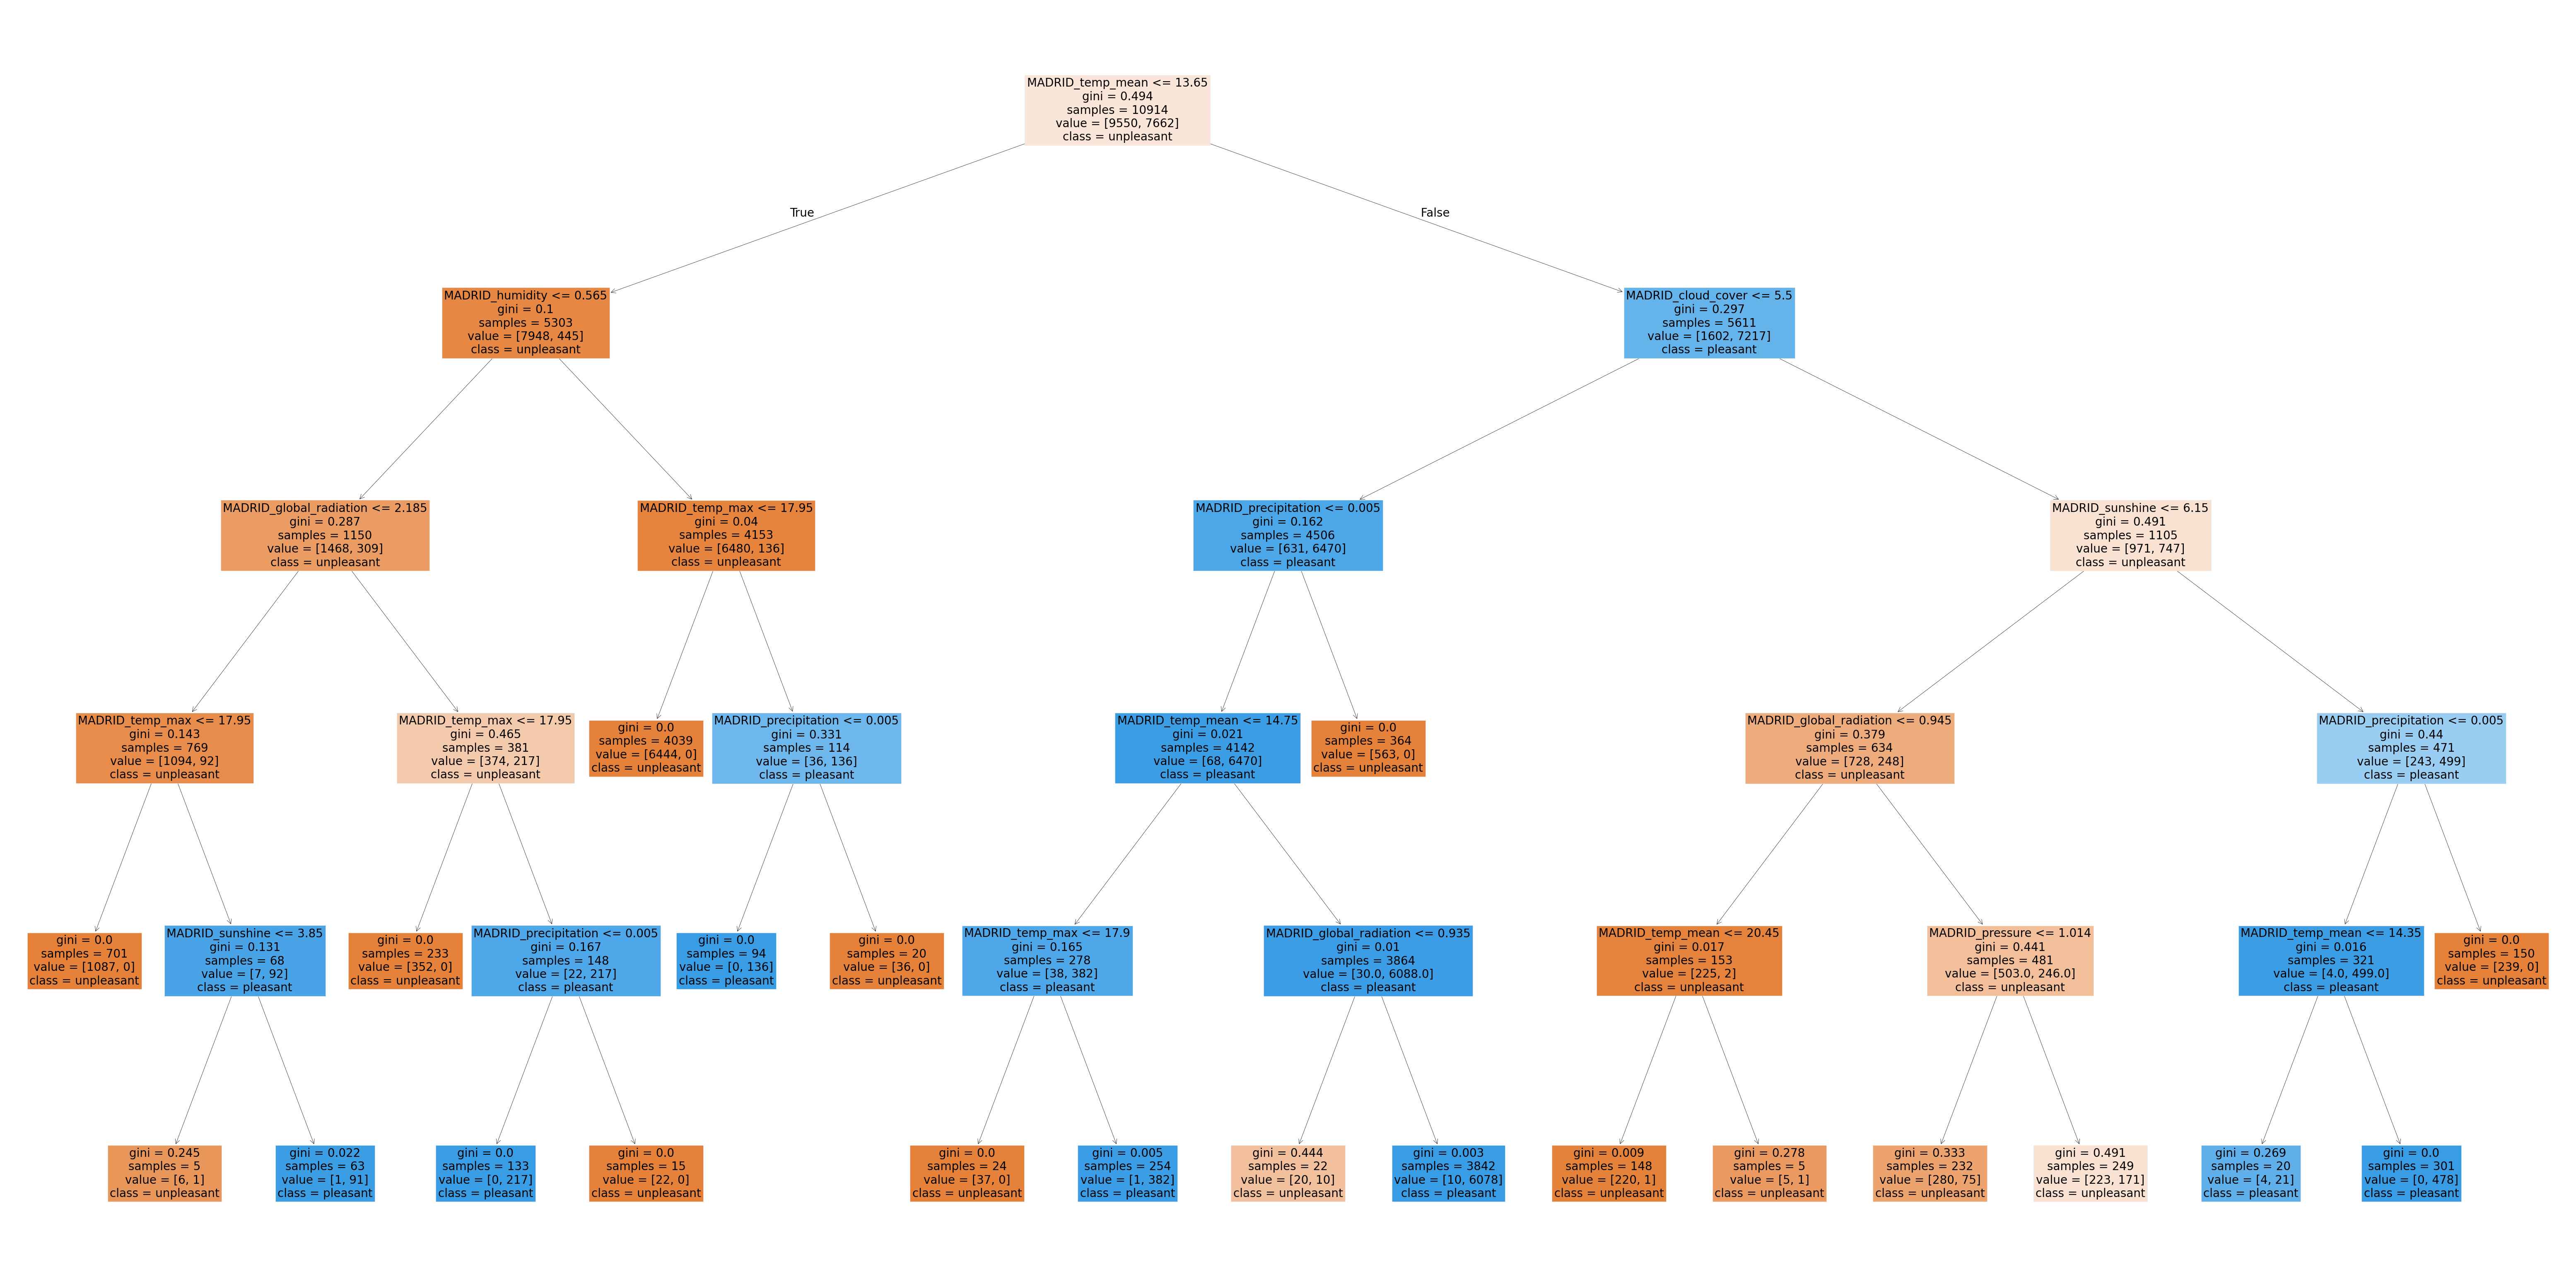

In [88]:
# Random tree for Madrid

fig = plt.figure(figsize=(80,40))
plot_tree(clfm.estimators_[5], fontsize = 20, feature_names=df_mad.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [89]:
feature_importances_m = clfm.feature_importances_
print("Feature Importances:", feature_importances_m)

Feature Importances: [0.02152823 0.01908241 0.00279899 0.09998377 0.16732657 0.07976775
 0.22412204 0.03072374 0.35466649]


In [1]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [92]:
# Create a dataframe to associate observation measurements with their importances
importances_m = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_m
})

In [95]:
# Sort by importance for chart readability
importances_m = importances_m.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(importances_m)

Collapsed Feature Importances:
        Measurement  Importance
8          temp_max    0.354666
6         temp_mean    0.224122
4     precipitation    0.167327
3  global_radiation    0.099984
5          sunshine    0.079768
7          temp_min    0.030724
0       cloud_cover    0.021528
1          humidity    0.019082
2          pressure    0.002799


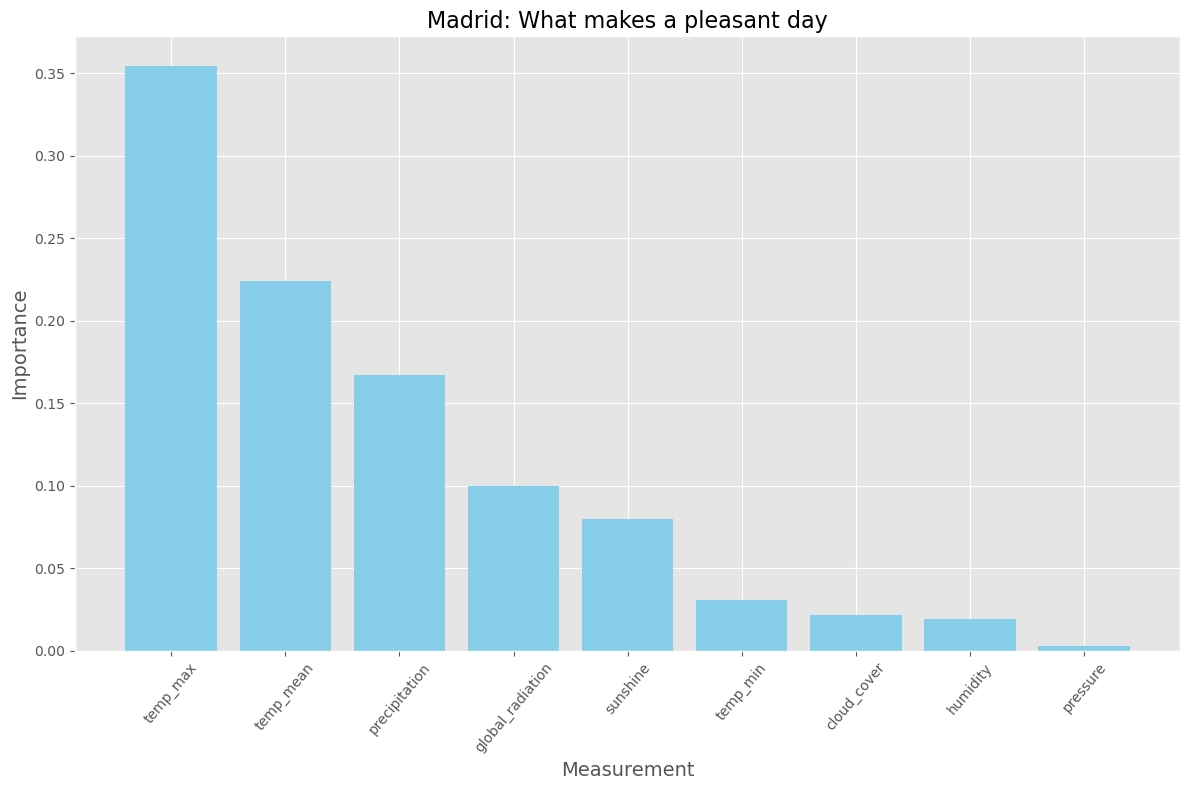

In [96]:
# Plot the importances

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(12, 8))
plt.bar(importances_m['Measurement'], importances_m['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Madrid: What makes a pleasant day', fontsize=16)
plt.tight_layout()
plt.show()

## Ljubjana Analysis

In [97]:
# Create a RF classifier
clfl= RandomForestClassifier(n_estimators = 100, max_depth = 5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clfl.fit(Xl_train, yl_train)

RandomForestClassifier(max_depth=5)

In [98]:
# Perform predictions on the test dataset
yl_pred = clfl.predict(Xl_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(yl_test, yl_pred))

Model Accuracy:  0.9998257232485186


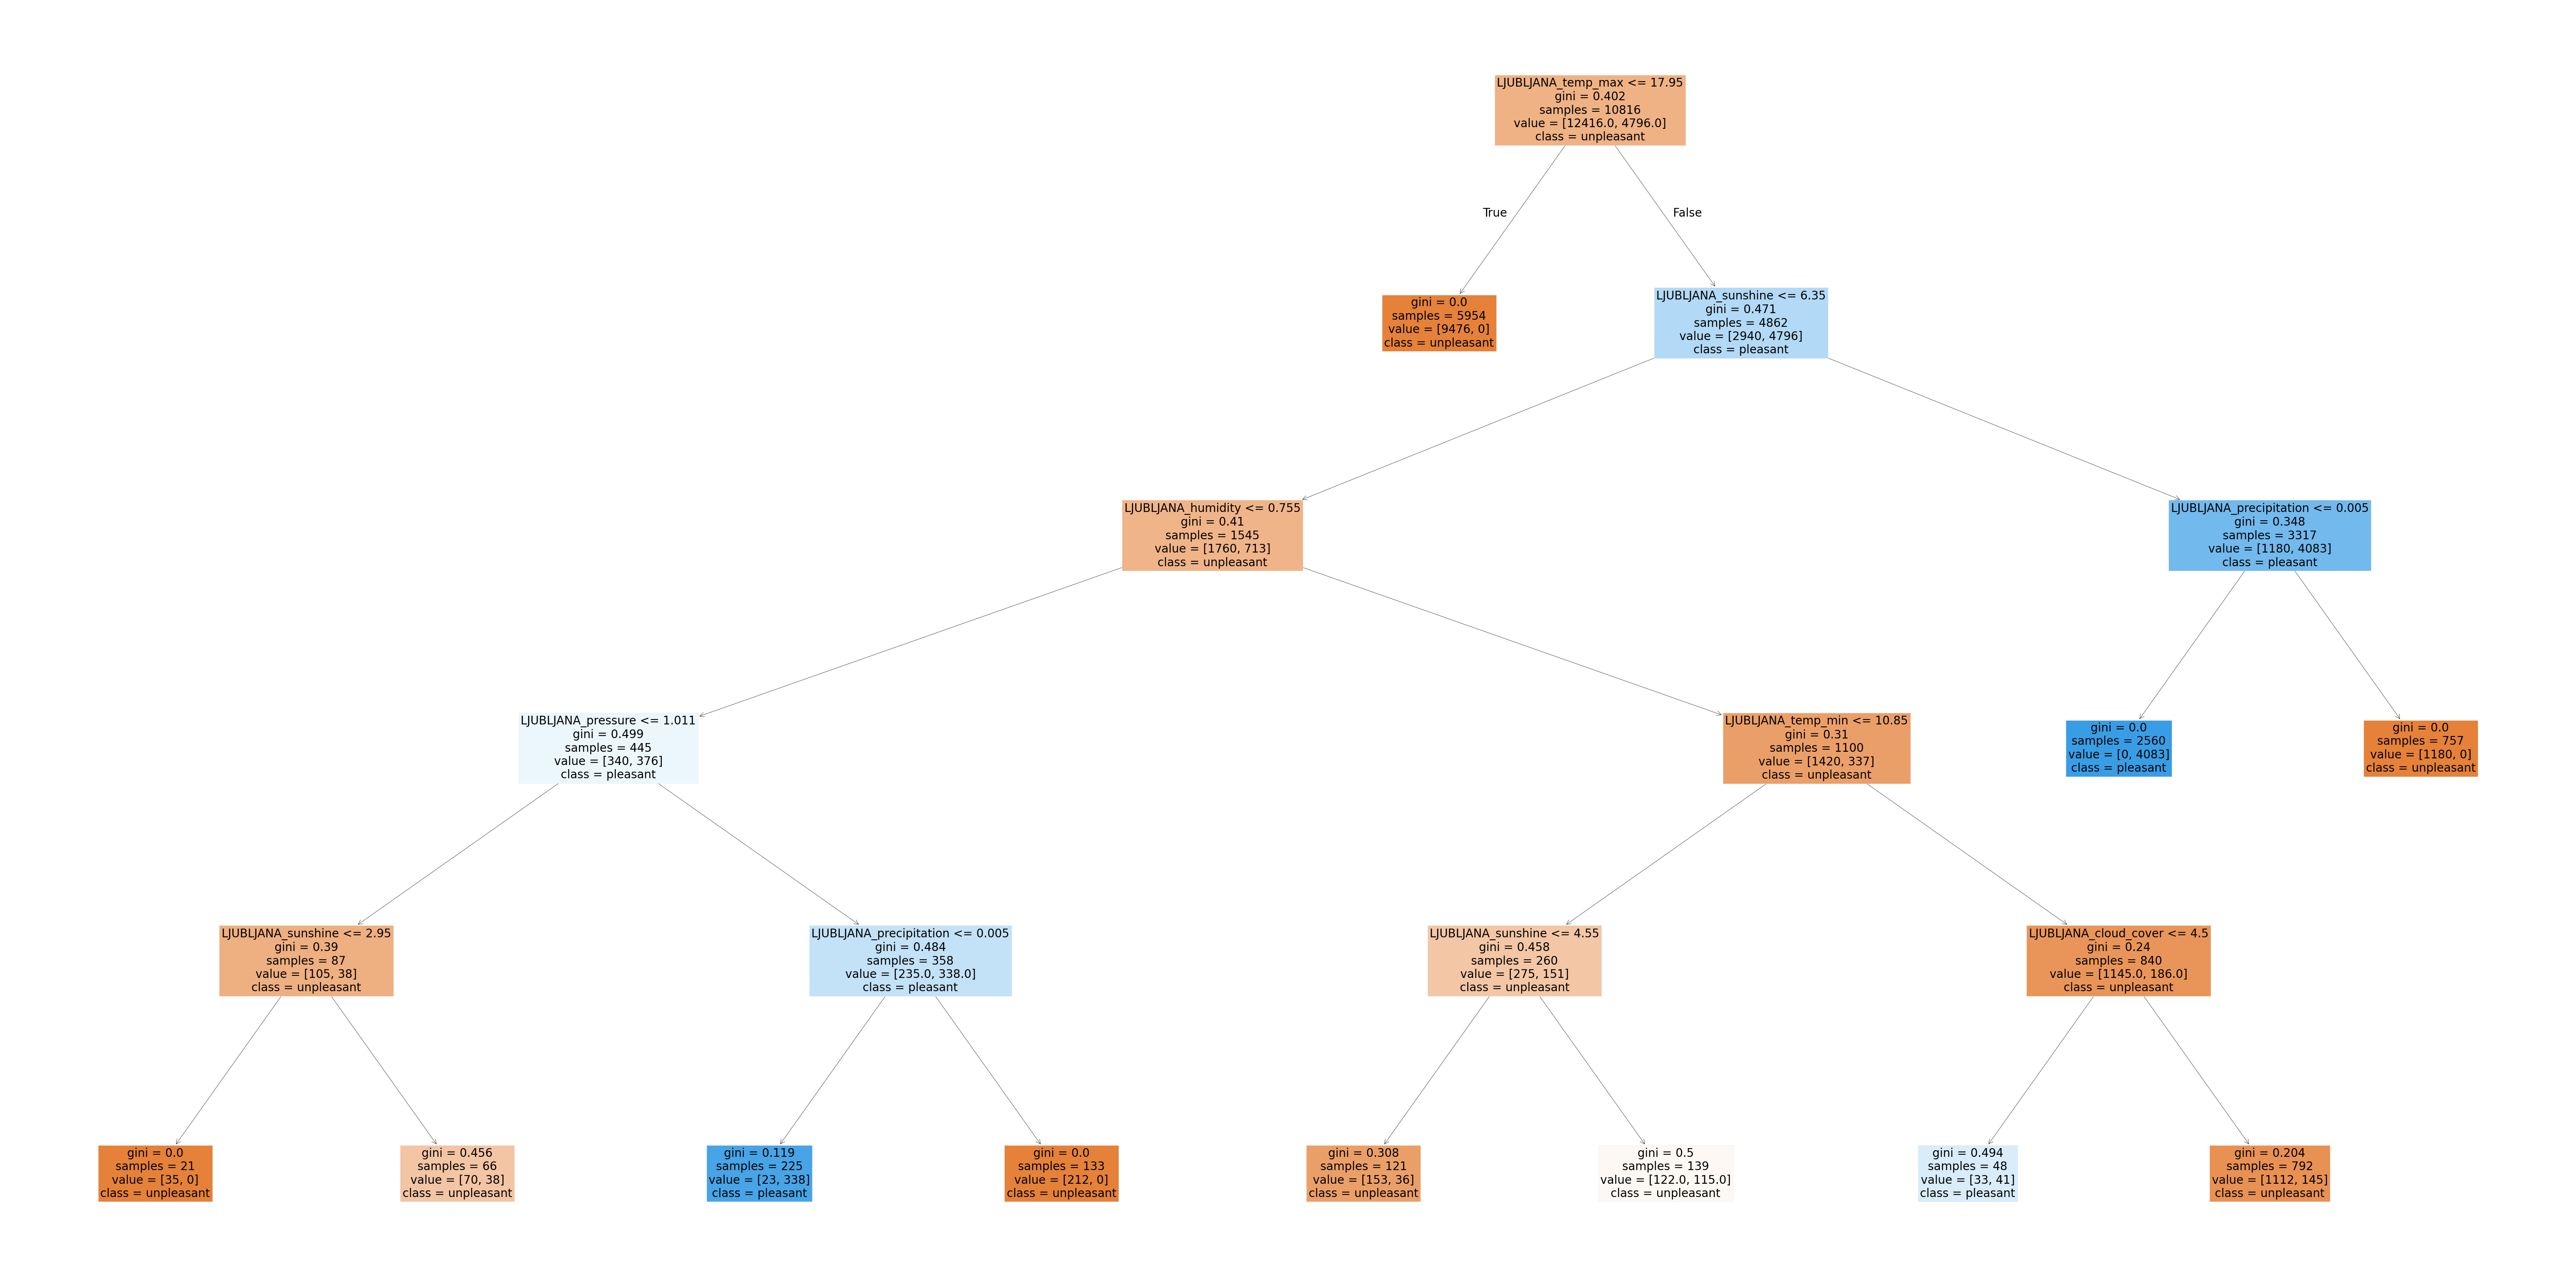

In [99]:
# Random tree for Ljubjana

fig = plt.figure(figsize=(80,40))
plot_tree(clfl.estimators_[5], fontsize = 20, feature_names=df_lju.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [100]:
feature_importances_l = clfl.feature_importances_
print("Feature Importances:", feature_importances_l)

Feature Importances: [0.04908423 0.01739435 0.00825268 0.07241613 0.30864171 0.11336611
 0.11843284 0.0242164  0.28819555]


In [101]:
# Create a dataframe to associate observation measurements with their importances
importances_l = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_l
})

In [102]:
# Sort by importance for chart readability
importances_l = importances_l.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(importances_l)

Collapsed Feature Importances:
        Measurement  Importance
4     precipitation    0.308642
8          temp_max    0.288196
6         temp_mean    0.118433
5          sunshine    0.113366
3  global_radiation    0.072416
0       cloud_cover    0.049084
7          temp_min    0.024216
1          humidity    0.017394
2          pressure    0.008253


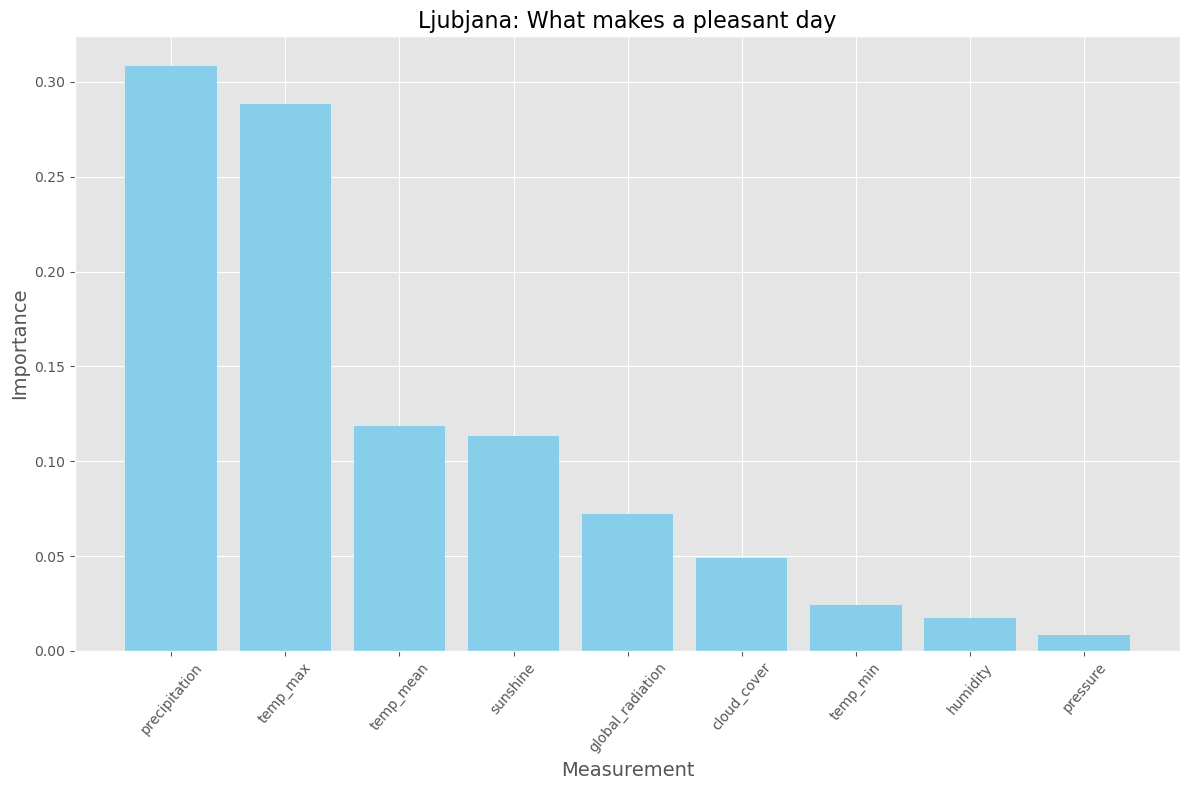

In [103]:
# Plot the importances

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(12, 8))
plt.bar(importances_l['Measurement'], importances_l['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Ljubjana: What makes a pleasant day', fontsize=16)
plt.tight_layout()
plt.show()

## Budapest analysis

In [104]:
# Create a RF classifier
clfb= RandomForestClassifier(n_estimators = 100, max_depth = 5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clfb.fit(Xb_train, yb_train)

RandomForestClassifier(max_depth=5)

In [105]:
# Perform predictions on the test dataset
yb_pred = clfb.predict(Xb_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(yb_test, yb_pred))

Model Accuracy:  1.0


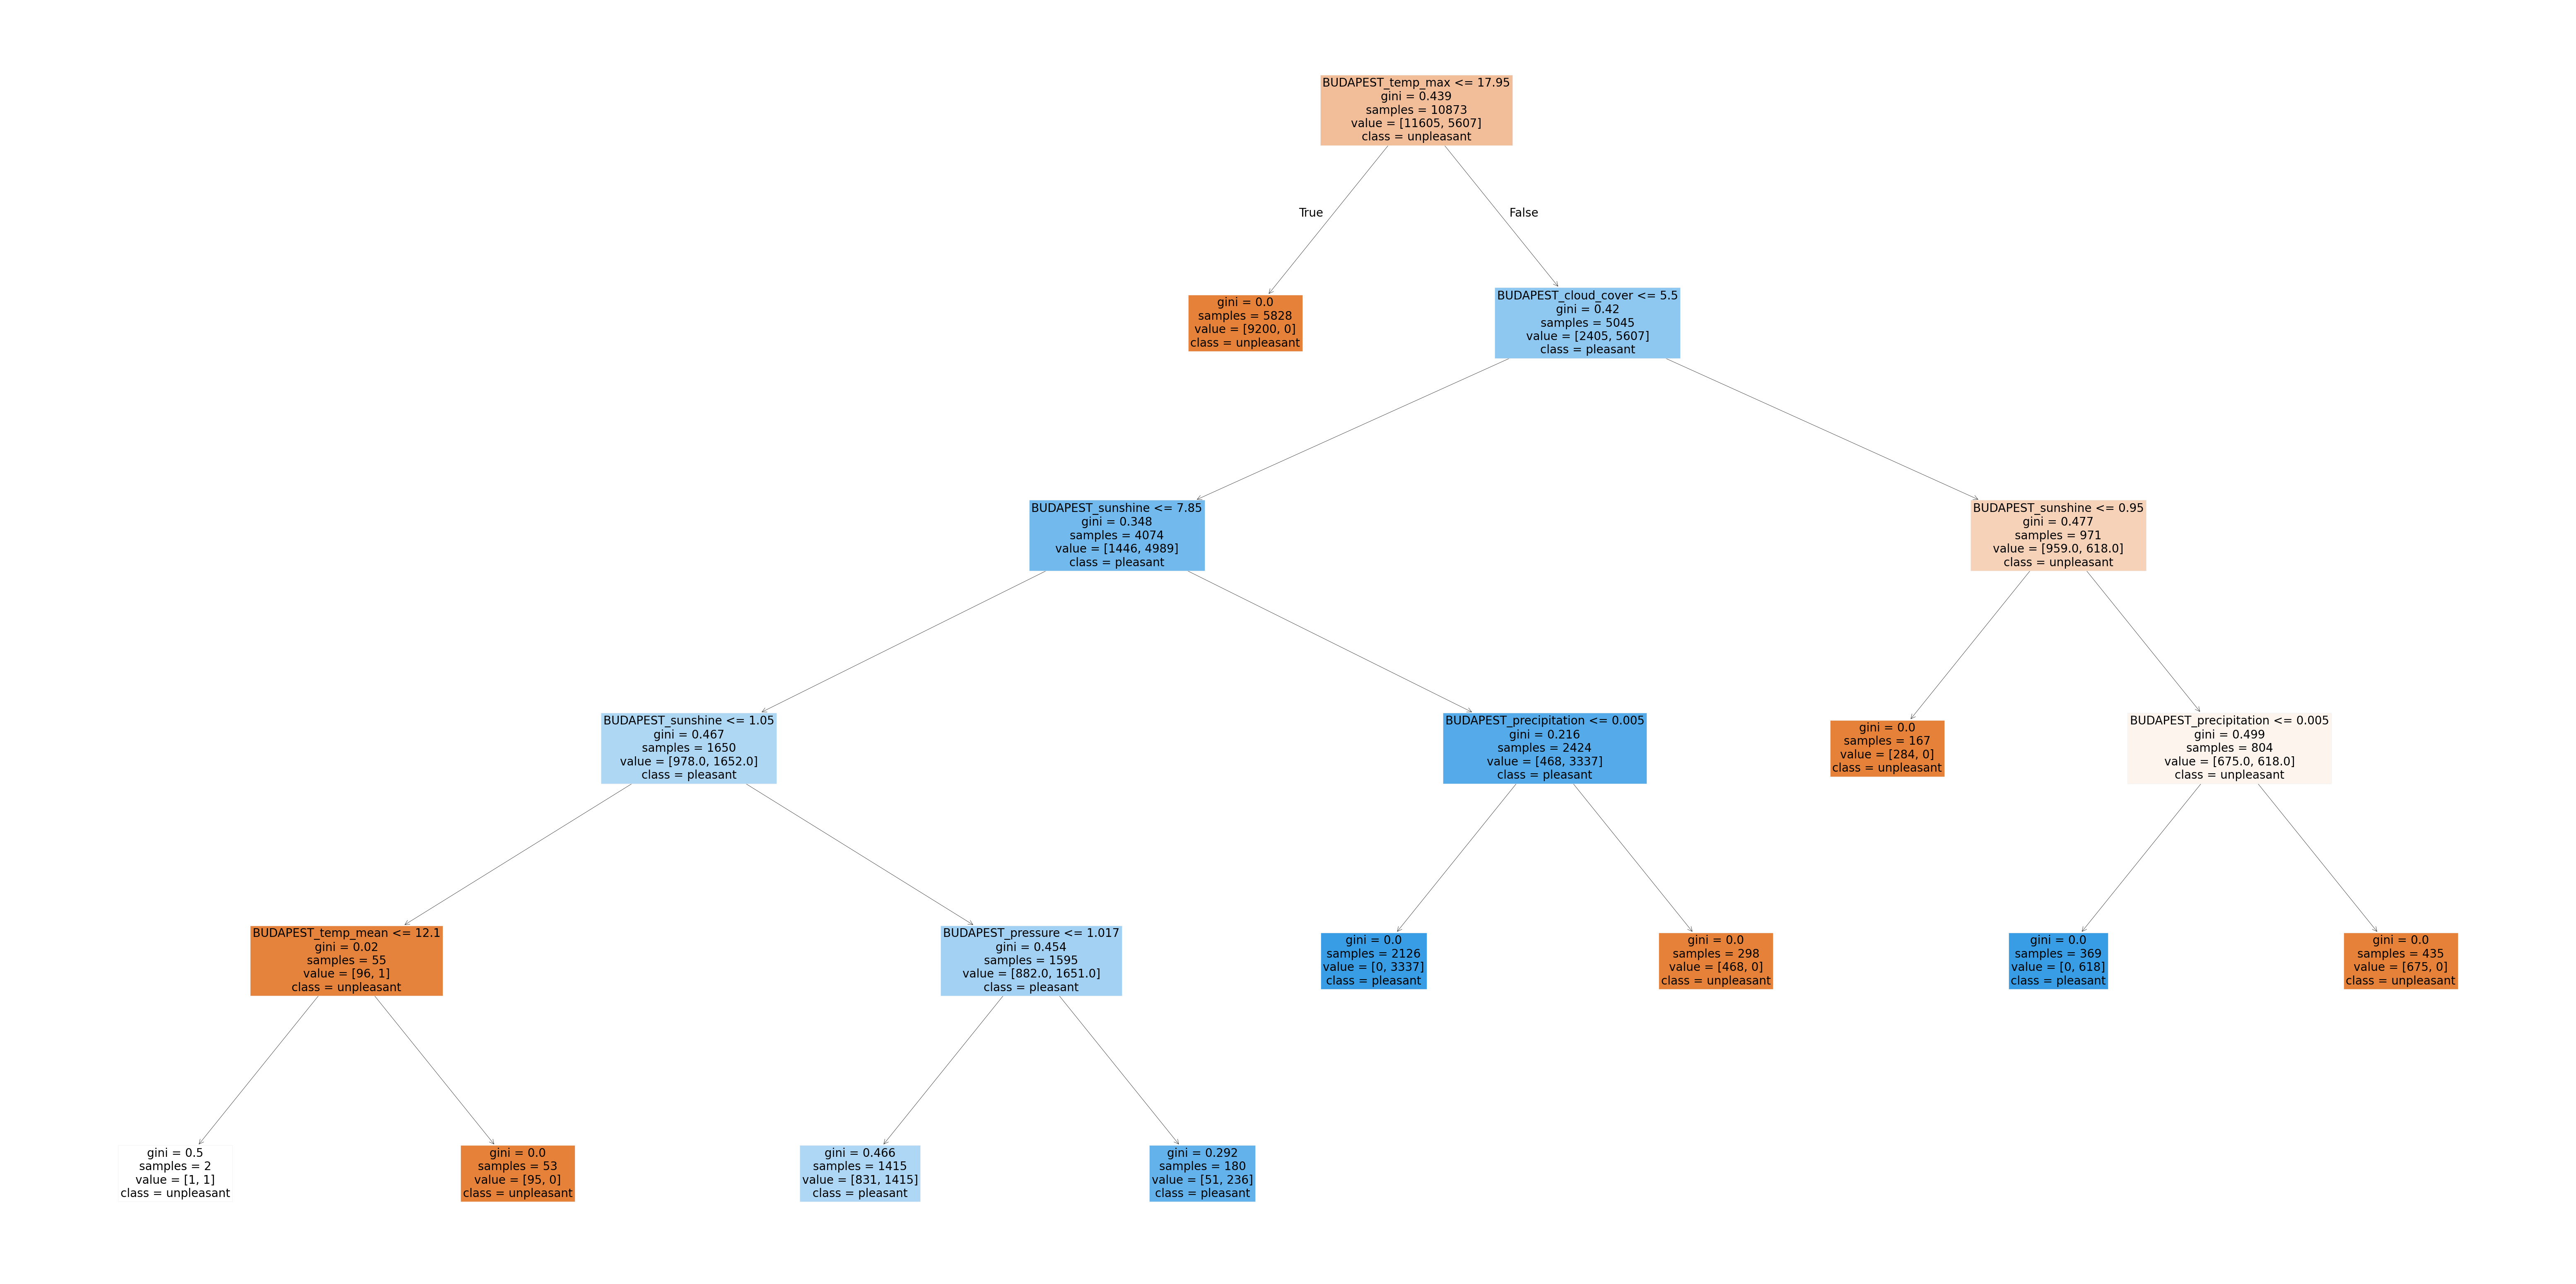

In [106]:
# Random tree for Budapest

fig = plt.figure(figsize=(80,40))
plot_tree(clfb.estimators_[5], fontsize = 20, feature_names=df_bud.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [107]:
feature_importances_b = clfb.feature_importances_
print("Feature Importances:", feature_importances_b)

Feature Importances: [0.01072553 0.01103163 0.00348138 0.05279374 0.31057849 0.07456512
 0.12209065 0.09408672 0.32064672]


In [108]:
# Create a dataframe to associate observation measurements with their importances
importances_b = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_b
})

In [109]:
# Sort by importance for chart readability
importances_b = importances_b.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(importances_b)

Collapsed Feature Importances:
        Measurement  Importance
8          temp_max    0.320647
4     precipitation    0.310578
6         temp_mean    0.122091
7          temp_min    0.094087
5          sunshine    0.074565
3  global_radiation    0.052794
1          humidity    0.011032
0       cloud_cover    0.010726
2          pressure    0.003481


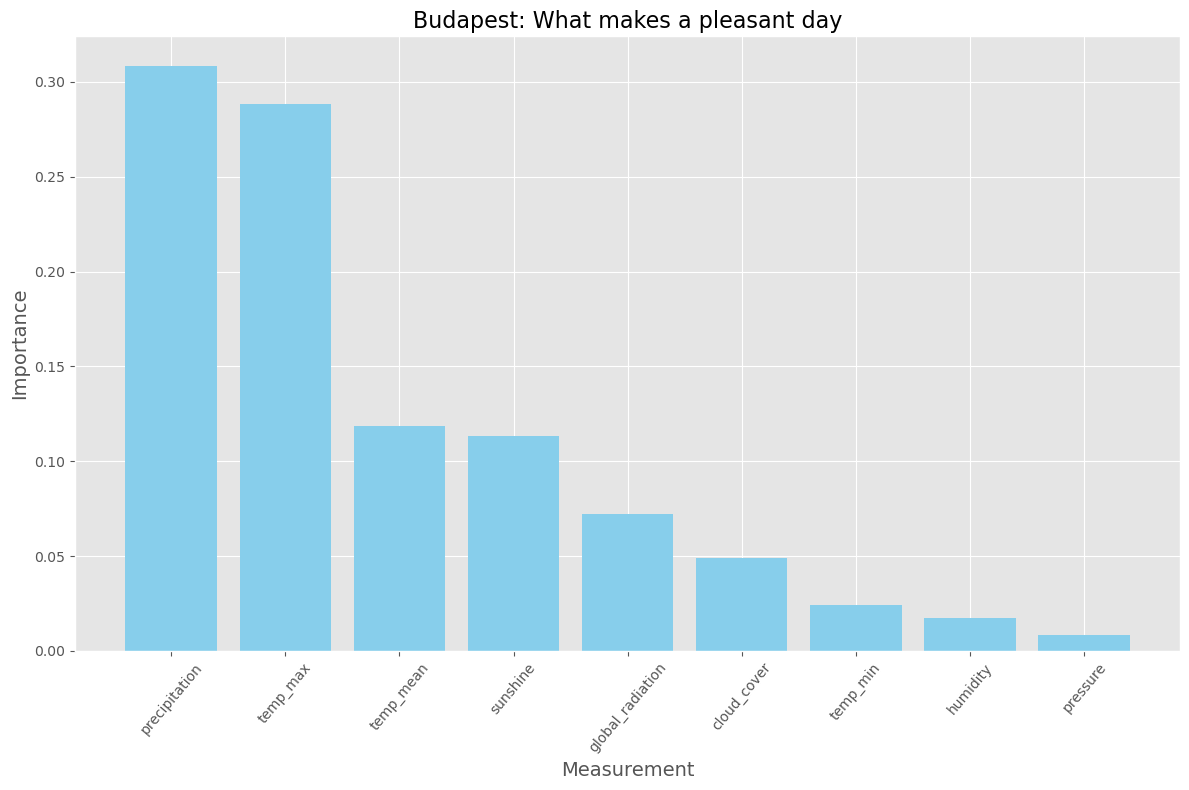

In [110]:
# Plot the importances

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(12, 8))
plt.bar(importances_l['Measurement'], importances_l['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Budapest: What makes a pleasant day', fontsize=16)
plt.tight_layout()
plt.show()